In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
import joblib

In [2]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Survived - Survival (0 = No; 1 = Yes). This is the Target variable
### Based on logical reasoning the following columns are not required for prediction analysis
### - Name
### - Cabin
### - Ticket
### - Fare
### - PassengerID

In [3]:
df=df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [4]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (891, 7)


In [5]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: True


### check for missing values

In [6]:
df[df.Survived.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [7]:
df[df.Pclass.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [7]:
df[df.Sex.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [8]:
df[df.SibSp.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [9]:
df[df.Parch.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [10]:
df[df.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,NaN,0,0,Q
17,1,2,male,NaN,0,0,S
19,1,3,female,NaN,0,0,C
26,0,3,male,NaN,0,0,C
28,1,3,female,NaN,0,0,Q
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,C
863,0,3,female,NaN,8,2,S
868,0,3,male,NaN,0,0,S
878,0,3,male,NaN,0,0,S


In [11]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [12]:
df[df["Survived"] == ""]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [13]:
df[df["Pclass"] == ""]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [14]:
df[df["Sex"] == ""]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [15]:
df[df["Age"] == ""]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [16]:
df[df["Parch"] == ""]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [17]:
df[df["Embarked"] == ""]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [18]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### First of all there is null values in Embarked and Age column we have to fill that acc to dist plots
### we can replace null values of embarked column using mode as it is more suited for categorical value

In [19]:
df[['Embarked']]=df[['Embarked']].fillna(df['Embarked'].mode()[0])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [20]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [21]:
df[df.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,NaN,0,0,Q
17,1,2,male,NaN,0,0,S
19,1,3,female,NaN,0,0,C
26,0,3,male,NaN,0,0,C
28,1,3,female,NaN,0,0,Q
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,C
863,0,3,female,NaN,8,2,S
868,0,3,male,NaN,0,0,S
878,0,3,male,NaN,0,0,S


In [22]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

### from above can observe the data types of appropriate columns

### conv categorical data into numerical data

In [23]:
dicty={}
for i in df[['Sex']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Sex': {'male': 0, 'female': 1}}

In [24]:
for i in ['Sex']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [25]:
dicty={}
for i in df[['Embarked']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Embarked': {'S': 0, 'C': 1, 'Q': 2}}

In [26]:
for i in ['Embarked']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

### check dist plots of all columns

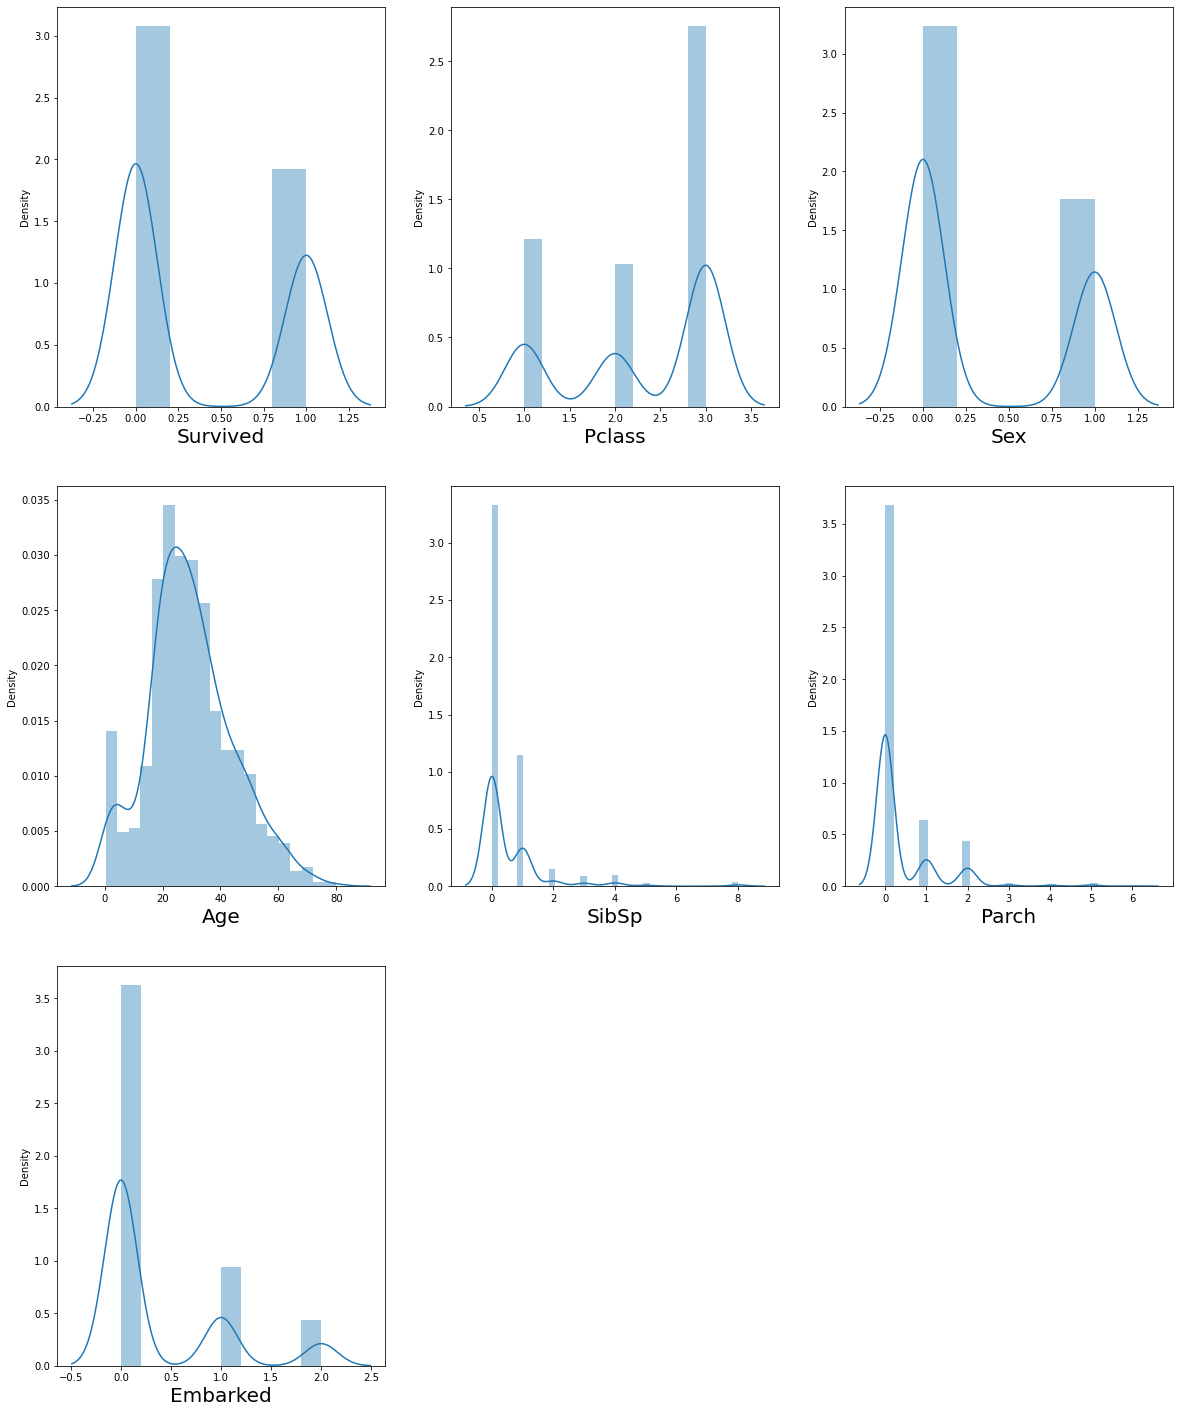

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### column age is normally distributed column
### sibsp & parch column are also normlly distributed but biasing is present in those column
### column embarked, pclass,Sex are not normally distributed plots

### We can use mean imputer on age column but mean imputation is bad practice as it doesn’t take into account Feature Correlation. It also reduces variance of the data and increases bias in data which leads to inaccuracy of model. Hence lets use knn imputer with n_neighbours=5. the missing values will be replaced by the mean value of 5 nearest neighbors measured by Euclidean distance

In [29]:
imputer =KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,3.0,0.0,22.0,1.0,0.0,0.0
1,1.0,1.0,1.0,38.0,1.0,0.0,1.0
2,1.0,3.0,1.0,26.0,0.0,0.0,0.0
3,1.0,1.0,1.0,35.0,1.0,0.0,0.0
4,0.0,3.0,0.0,35.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,27.0,0.0,0.0,0.0
887,1.0,1.0,1.0,19.0,0.0,0.0,0.0
888,0.0,3.0,1.0,29.0,1.0,2.0,0.0
889,1.0,1.0,0.0,26.0,0.0,0.0,1.0


In [31]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


### Age is continous value of data varying in a long range. Age column can be converted into groups of age for better modeling of data.
### Converting age into age group

In [32]:
df['Age_group']=1

In [33]:
for i in range(len(df)):
    if df['Age'][i]<=16:
        df['Age_group'][i]=0
    elif df['Age'][i]>16 and df['Age'][i]<=26:
        df['Age_group'][i]=1
    elif df['Age'][i]>26 and df['Age'][i]<=36:
        df['Age_group'][i]=2
    elif df['Age'][i]>36 and df['Age'][i]<=46:
        df['Age_group'][i]=3
    elif df['Age'][i]>46 and df['Age'][i]<=56:
        df['Age_group'][i]=4
    else:
        df['Age_group'][i]=5

### After convertion age column is not required

In [34]:
df=df.drop(['Age'],axis=1)

### Check for data  imbalancemnt

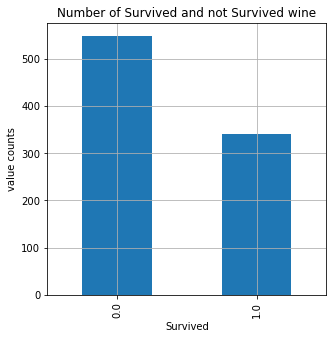

In [35]:
plt.figure(figsize=[5,5])
df['Survived'].value_counts().plot(kind='bar')
plt.xlabel("Survived")
plt.ylabel('value counts')
plt.title('Number of Survived and not Survived wine')
plt.grid()

### data is imbalanced

### before upsampling check for correlation to choose columns and upsample using those columns only

<AxesSubplot:>

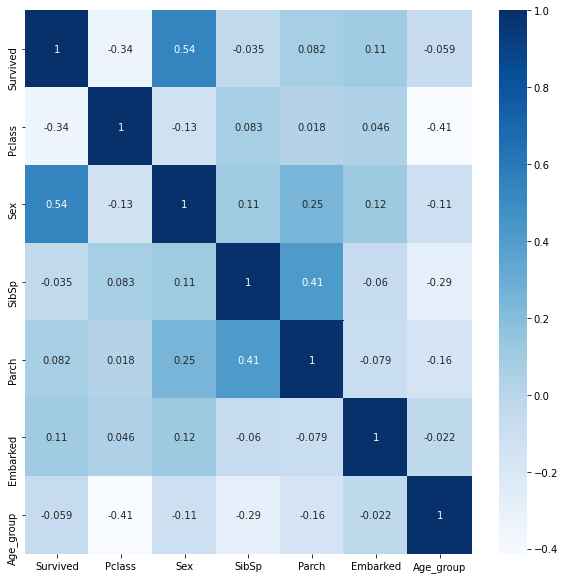

In [36]:
plt.figure(figsize=[10,10])
sn.heatmap(df.corr(),annot=True,cmap='Blues')

### no columns can be dropped by looking at heatmap. Now start with upsampling of data

In [38]:
dfmin=df[df['Survived']==1]
dfmax=df[df['Survived']==0]
dfminup=resample(dfmin,replace=True,n_samples=549,random_state=123)
dff=pd.concat([dfmax, dfminup])
dff

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_group
0,0.0,3.0,0.0,1.0,0.0,0.0,1
4,0.0,3.0,0.0,0.0,0.0,0.0,2
5,0.0,3.0,0.0,0.0,0.0,2.0,2
6,0.0,1.0,0.0,0.0,0.0,0.0,4
7,0.0,3.0,0.0,3.0,1.0,0.0,0
...,...,...,...,...,...,...,...
530,1.0,2.0,1.0,1.0,1.0,0.0,0
52,1.0,1.0,1.0,1.0,0.0,1.0,4
645,1.0,1.0,0.0,1.0,0.0,1.0,4
435,1.0,1.0,1.0,1.0,2.0,0.0,0


### now data is balanced and can be verfied

In [39]:
dff.Survived.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

### check for outliers

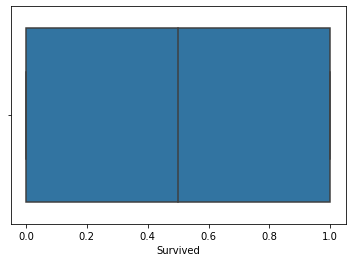

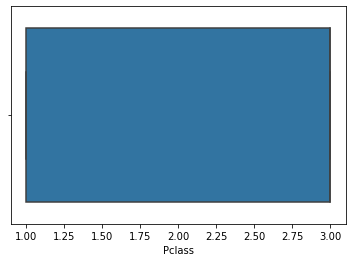

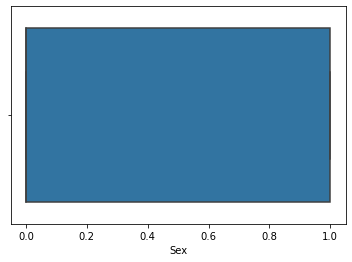

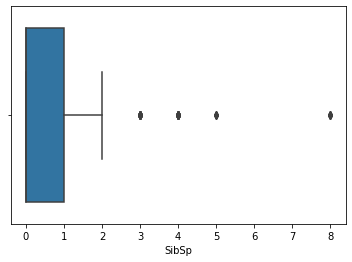

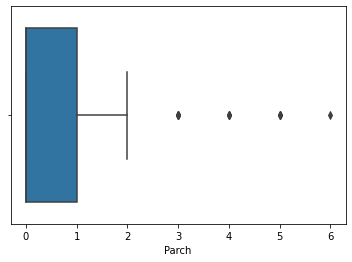

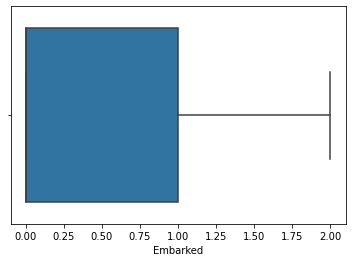

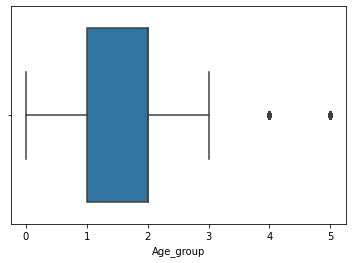

In [40]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

### Sibsp Parch & Age_group have outliers but categorical outliers don’t really exist without context. Hence outliers are valid in categorical data

### do the analyzes of whole dataset

In [41]:
dff.describe()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_group
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,0.500000,2.247723,0.387067,0.515483,0.399818,0.390710,1.765027
std,0.500228,0.862793,0.487301,1.034605,0.788176,0.642881,1.299105
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.500000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,2.000000,5.000000


### we need to plot bar graph and analyze the impact of data point of each column on the target variable

In [42]:
def bar_chart(feature):
    survived = dff[dff['Survived']==1][feature].value_counts()
    dead = dff[dff['Survived']==0][feature].value_counts()
    df1 = pd.DataFrame([survived,dead])
    df1.index = ['Survived','Dead']
    df1.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 1.0    226
3.0    206
2.0    117
Name: Pclass, dtype: int64
Dead:
 3.0    372
2.0     97
1.0     80
Name: Pclass, dtype: int64


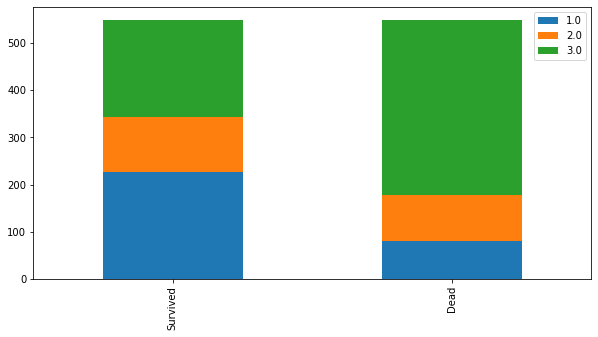

In [43]:
bar_chart('Pclass')
print("Survived :\n",dff[dff['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",dff[dff['Survived']==0]['Pclass'].value_counts())

### from above graph we can deduce that pclass 1 have more chances of survival than others. pclass 3 has higher chances of not surviving

Survived :
 1.0    344
0.0    205
Name: Sex, dtype: int64
Dead:
 0.0    468
1.0     81
Name: Sex, dtype: int64


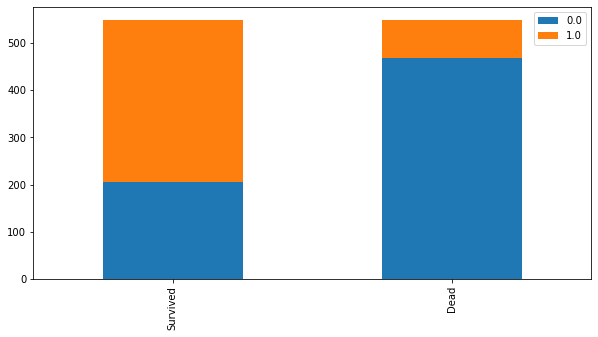

In [44]:
bar_chart('Sex')
print("Survived :\n",dff[dff['Survived']==1]['Sex'].value_counts())
print("Dead:\n",dff[dff['Survived']==0]['Sex'].value_counts())

### there is more chances of female to survive than male (male:0 ,female:1)

Survived :
 0.0    329
1.0    194
2.0     15
3.0      6
4.0      5
Name: SibSp, dtype: int64
Dead:
 0.0    398
1.0     97
2.0     15
4.0     15
3.0     12
8.0      7
5.0      5
Name: SibSp, dtype: int64


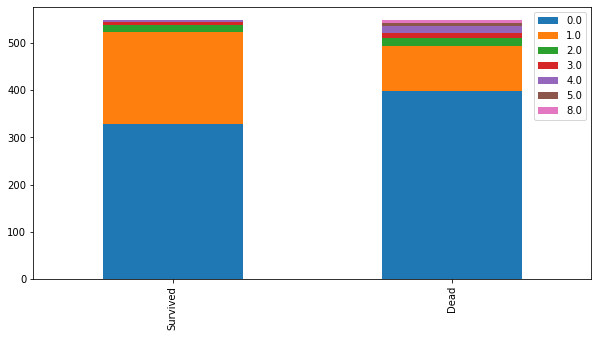

In [45]:
bar_chart('SibSp')
print("Survived :\n",dff[dff['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",dff[dff['Survived']==0]['SibSp'].value_counts())

### for higher sibsp there is less chances of survival

Survived :
 0.0    372
1.0     99
2.0     75
3.0      3
Name: Parch, dtype: int64
Dead:
 0.0    445
1.0     53
2.0     40
5.0      4
4.0      4
3.0      2
6.0      1
Name: Parch, dtype: int64


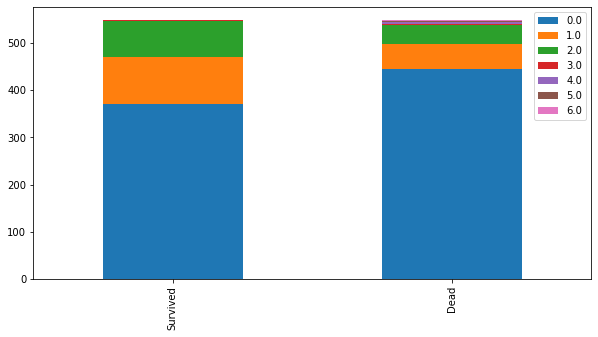

In [46]:
bar_chart('Parch')
print("Survived :\n",dff[dff['Survived']==1]['Parch'].value_counts())
print("Dead:\n",dff[dff['Survived']==0]['Parch'].value_counts())

### for higher Parch there is less chances of survival

Survived :
 0.0    338
1.0    162
2.0     49
Name: Embarked, dtype: int64
Dead:
 0.0    427
1.0     75
2.0     47
Name: Embarked, dtype: int64


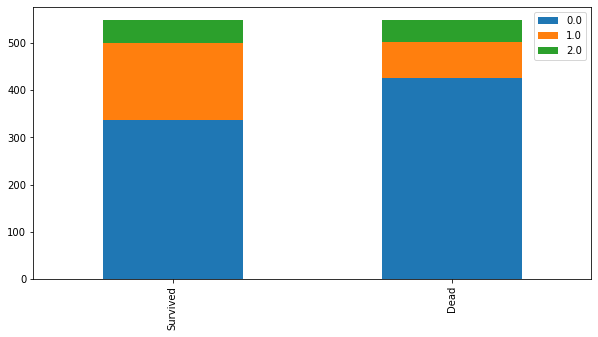

In [47]:
bar_chart('Embarked')
print("Survived :\n",dff[dff['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",dff[dff['Survived']==0]['Embarked'].value_counts())

### embark value 0 has higher chances of not surviving, embark value 1 has higher chances of surviving and embark value 2 does not provide distinguish between survived and dead passengers

Survived :
 1    159
2    159
0    117
4     48
3     46
5     20
Name: Age_group, dtype: int64
Dead:
 1    189
2    155
3     89
0     56
4     35
5     25
Name: Age_group, dtype: int64


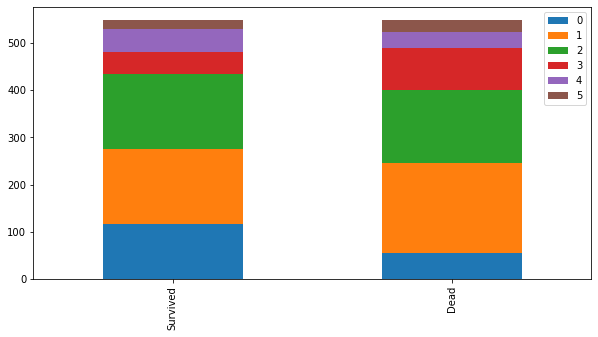

In [48]:
bar_chart('Age_group')
print("Survived :\n",dff[dff['Survived']==1]['Age_group'].value_counts())
print("Dead:\n",dff[dff['Survived']==0]['Age_group'].value_counts())

### passengers belonging to younger age group have more chances of survival compared to the older age groups.

### now we need to perform feature scaling and seperate independent and independent variable 

In [49]:
sc=StandardScaler()
sc.fit(dff.drop(['Survived'],axis=1))
fx=sc.transform(dff.drop(['Survived'],axis=1))
x=pd.DataFrame(fx,columns=dff.drop(['Survived'],axis=1).columns)
x

,Pclass,Sex,SibSp,Parch,Embarked,Age_group
0,0.872306,-0.794670,0.468525,-0.507501,-0.608026,-0.589157
1,0.872306,-0.794670,-0.498468,-0.507501,-0.608026,0.180955
2,0.872306,-0.794670,-0.498468,-0.507501,2.504388,0.180955
3,-1.446804,-0.794670,-0.498468,-0.507501,-0.608026,1.721179
4,0.872306,-0.794670,2.402511,0.761829,-0.608026,-1.359268
...,...,...,...,...,...,...
1093,-0.287249,1.258384,0.468525,0.761829,-0.608026,-1.359268
1094,-1.446804,1.258384,0.468525,-0.507501,0.948181,1.721179
1095,-1.446804,-0.794670,0.468525,-0.507501,0.948181,1.721179
1096,-1.446804,1.258384,0.468525,2.031160,-0.608026,-1.359268


In [50]:
y=dff[['Survived']]
y

,Survived
0,0.0
4,0.0
5,0.0
6,0.0
7,0.0
...,...
530,1.0
52,1.0
645,1.0
435,1.0


### check for biasing and remove if detected

In [51]:
print(x.skew())

Pclass      -0.499905
Sex          0.464348
SibSp        3.743598
Parch        2.408702
Embarked     1.402632
Age_group    0.667005
dtype: float64


In [52]:
print(len(x.skew().loc[x.skew()>0.55]))

4


In [53]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [54]:
#lets again check the skewness
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

Pclass      -0.499905
Sex          0.464348
SibSp        0.824668
Parch        1.183055
Embarked     0.894548
Age_group    0.038106
dtype: float64

3


### try to reduce more columns if possible by using pca

In [55]:
for i in range(2,7):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.5244300433484073
3 0.6999321252480051
4 0.8265399134050188
5 0.9228957170088729
6 1.0


### use all columns as the data retention is low after dropping more columns.

### write a program to find the best random state for the choosen model

In [56]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

### using for loop iterate through all the models below and find the best one

In [57]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),LabelSpreading(),LabelPropagation(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [58]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8295843426427283
roc 0.7363636363636363
diff 0.09322070627909196
**********
DecisionTreeClassifier()
score 0.8573917070390425
roc 0.7863636363636364
diff 0.07102807067540617
**********
KNeighborsClassifier()
score 0.8638015638358507
roc 0.7272727272727273
diff 0.13652883656312342
**********
RandomForestClassifier()
score 0.8893339745416547
roc 0.781818181818182
diff 0.10751579272347278
**********
SVC()
score 0.857731013109148
roc 0.7545454545454545
diff 0.10318555856369349
**********
RidgeClassifier()
score 0.8284156217345873
roc 0.7363636363636363
diff 0.09205198537095094
**********
BaggingClassifier()
score 0.8840966977771446
roc 0.7772727272727272
diff 0.10682397050441739
**********
GradientBoostingClassifier()
score 0.8872090814097084
roc 0.7772727272727272
diff 0.10993635413698122
**********
SGDClassifier()
score 0.7626977058991166
roc 0.7272727272727272
diff 0.03542497862638938
**********
LGBMClassifier()
score 0.8955933254963429
roc 0.7909

### from above given acc of diff models. Decision tree is the least overfitted model with higher accuracy hence choose decision tree(acc:85%,roc score:78%,diff is of 7%). 
### Rest all models might contain higher accuracy but have higher difference in acc score and roc score hence are overfitted. Only few provide models provide minimum diff but have less accuracy

### perform hyperameter tuning on decision tree

In [59]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':list(range(3,11))}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}

### choose best random state

In [60]:
besttrain(DecisionTreeClassifier(max_depth=7,criterion='gini',max_features='sqrt'),x,y)

maximum roc_auc_score is at random state : 65  and it is : 0.8636363636363636


### fit the model

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 65,test_size=0.20,stratify=y)
rf_clf=DecisionTreeClassifier(max_depth=7,criterion='gini',max_features='sqrt')
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

### check all the metrics of the model

In [62]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(rf_clf,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[96 14]
 [30 80]]
f1 score is :  0.7843137254901961
classification report 
               precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       110
         1.0       0.85      0.73      0.78       110

    accuracy                           0.80       220
   macro avg       0.81      0.80      0.80       220
weighted avg       0.81      0.80      0.80       220

AUC ROC Score:  0.8000000000000002
CV mean 0.8606103571157784
std: 0.02347442114093113


### cross validation score of model is at 86%. test roc accuracy is at 80%. std error is at 2%. f1 score is 78%. 
### accuracy of model obtained from confusion matrix is 80%. ((96+80)/(96+80+14+30))

### Roc curve of the model is shown below

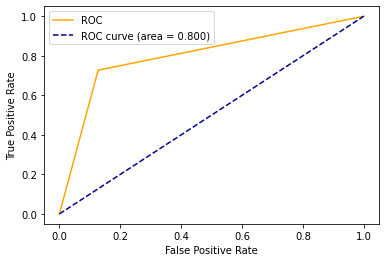

In [63]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### save model

In [65]:
joblib.dump(rf_clf, 'titanic_datset_decisiontree.pkl')

['titanic_datset_decisiontree.pkl']